# Urban Hierarchies of the United States using population and Gross Domestic Income (GDP) data

This Jupyter notebook analyzes the urban hierarchy of the United States using population and Gross Domestic Income (GDP) data. For the analysis, this notebook utilizes varous Python packages: Pandas (https://pandas.pydata.org/), GeoPandas (https://geopandas.org/en/stable/#), Matplotlib (https://matplotlib.org/) and Scipy (https://scipy.org/). 

### Data: 
- County Geometry: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html 
- County-level Population (American Community Survey): https://www.census.gov/programs-surveys/acs/data.html 
- County-level GDP (Bureau of Economic Analysis): https://www.bea.gov/data/gdp/gdp-county-metro-and-other-areas

### Steps: 
1. Preprocessing County Geometry with GeoPandas <br>
    1.1. Read the shapefile using GeoPandas <br>
    1.2. Calculate two-digit State ID using county-level GEOID <br>
    1.3. Select counties only for conterminous United States <br>

2. Preprocessing GDP data with Pandas <br>
    2.1. Load Excel File with Pandas <br>
    2.2. Check the data type of columns of the Pandas DataFrame and change the data type accordingly <br>
    2.3. Solve the problem of missing leading zero (e.g., Alabama: 01) <br>
    2.4. Select rows based on a condition <br>

3. Plotting county-level GDP for the conterminous United States <br>
    3.1. Join (Merge) county geometry and GDP data <br>
    3.2. Make a choropleth map of GDP data
        - Classification
        - Change colors
        - Legend
        - Change coordinate system
        - Multiple layers


4. Hands-on practice using population data with Pandas and GeoPandas  <br>
    4.1. Preprocessing the population data with Pandas <br>
    4.2. Plotting county-level population for the conterminous United States <br>

# Import Packages
A Python package is a way of organizing related Python modules into a single directory hierarchy. It provides a mechanism for grouping Python code files, resources, and configuration settings in a structured manner, making it easier to manage and distribute code. They also facilitate code reuse and distribution by allowing developers to bundle related functionality together and share it with others.

We will be using the following packages in this notebook: <br>
`pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. <br>
source: https://pandas.pydata.org/docs/getting_started/overview.html

`geopandas` is the geographic expansion of `pandas`, allowing to have geometry and working with vector data. <br>
source: https://geopandas.org/en/stable/getting_started/introduction.html

`matplotlib` provides a collection of functions that make plots and maps. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. <br>
source: https://matplotlib.org/stable/users/getting_started/

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preprocessing County Geometry with GeoPandas
## 1.1. Read the shapefile using GeoPandas

In [3]:
# .read_file() method is used to read various spatial data formats (shapefile, GeoJSON, etc.)
county_gdf = gpd.read_file('./data/county_simplified.shp')
county_gdf

,GEOID,NAME,geometry
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404..."
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253..."
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621..."
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000..."
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765..."
...,...,...,...
3229,72151,"Yabucoa Municipio, Puerto Rico","POLYGON ((-65.82748 18.05507, -65.82910 18.052..."
3230,72153,"Yauco Municipio, Puerto Rico","POLYGON ((-66.87603 18.01490, -66.87813 18.016..."
3231,78010,None,"MULTIPOLYGON (((-64.84404 17.68717, -64.84570 ..."
3232,78020,None,"MULTIPOLYGON (((-64.79905 18.32969, -64.79862 ..."


In [9]:
# When you import a spatial data, the type of the object is a GeoDataFrame
type(county_gdf)

geopandas.geodataframe.GeoDataFrame

In [10]:
county_gdf.columns

Index(['GEOID', 'NAME', 'geometry'], dtype='object')

In [11]:
county_gdf['GEOID']

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3229    72151
3230    72153
3231    78010
3232    78020
3233    78030
Name: GEOID, Length: 3234, dtype: object

<Axes: >

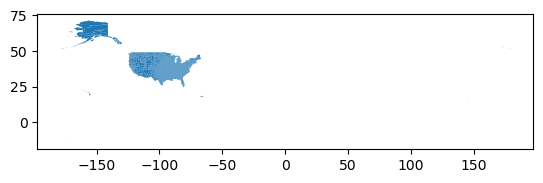

In [12]:
# You can use .plot() method to plot the GeoDataFrame. If there is no 'geometry' column, it will plot a numerical values.
county_gdf.plot()

In [13]:
county_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 1.2. Calculate two-digit State ID using five-digit county-level GEOID

Since the US has territory outside of the conterminous United States (e.g., Hawaii, Puerto Rico), so we need to use the two-digit state code to select the counties in the conterminous United States.

In [4]:
# .iterrows() method is used to iterate over the rows of a DataFrame. It returns an iterator containing index of each row and the data in each row as a Series.
for idx, row in county_gdf.iterrows():
    # .at[] method is used to access a single value for a row/column label pair.
    # row['GEOID'] is a string, so we can use string slicing to get the first two characters of the string.
    county_gdf.at[idx, 'STATE'] = row['GEOID'][0:2]

county_gdf

,GEOID,NAME,geometry,STATE
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253...",01
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621...",01
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000...",01
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765...",01
...,...,...,...,...
3229,72151,"Yabucoa Municipio, Puerto Rico","POLYGON ((-65.82748 18.05507, -65.82910 18.052...",72
3230,72153,"Yauco Municipio, Puerto Rico","POLYGON ((-66.87603 18.01490, -66.87813 18.016...",72
3231,78010,None,"MULTIPOLYGON (((-64.84404 17.68717, -64.84570 ...",78
3232,78020,None,"MULTIPOLYGON (((-64.79905 18.32969, -64.79862 ...",78


## 1.3. Select counties only for conterminous United States

In [6]:
# GEOID for Conterminous US States (Lower 48 States)
lower_48_states = ['01', '04', '05', '06', '08', '09', '10', '11', '12', '13', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', 
                   '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', 
                   '53', '54', '55', '56']

In [13]:
# It is possible to compare the value within the Series to a list of values or a single value. The result is a boolean Series.
county_gdf['STATE'] == '38' # North Dakota

0       False
1       False
2       False
3       False
4       False
        ...  
3229    False
3230    False
3231    False
3232    False
3233    False
Name: STATE, Length: 3234, dtype: bool

In [14]:
# .loc method is used to access a group of rows and columns by label(s) or a boolean array.
county_gdf.loc[county_gdf['STATE'] == '38']

,GEOID,NAME,geometry,STATE
1991,38001,"Adams County, North Dakota","POLYGON ((-102.99537 46.03213, -102.99525 46.1...",38
1992,38003,"Barnes County, North Dakota","POLYGON ((-97.95019 47.24042, -97.94019 47.240...",38
1993,38005,"Benson County, North Dakota","POLYGON ((-98.94480 48.00280, -98.94078 48.001...",38
1994,38007,"Billings County, North Dakota","POLYGON ((-103.66701 47.12447, -103.66691 47.1...",38
1995,38009,"Bottineau County, North Dakota","POLYGON ((-100.92058 48.99956, -100.91794 48.9...",38
1996,38011,"Bowman County, North Dakota","POLYGON ((-104.04576 46.12395, -104.04524 46.1...",38
1997,38013,"Burke County, North Dakota","POLYGON ((-102.93966 48.76401, -102.93946 48.8...",38
1998,38015,"Burleigh County, North Dakota","POLYGON ((-100.83024 46.77585, -100.82912 46.7...",38
1999,38017,"Cass County, North Dakota","POLYGON ((-96.79627 46.80343, -96.79610 46.803...",38
2000,38019,"Cavalier County, North Dakota","POLYGON ((-99.00013 48.89118, -99.00045 48.891...",38


In [15]:
# It is also possible to use the .isin() method to filter a DataFrame based on a list of values.
county_gdf_us = county_gdf.loc[county_gdf['STATE'].isin(lower_48_states)]
# county_gdf_us = county_gdf.loc[county_gdf['STATE'].isin(lower_48_states)].reset_index(drop=True)
county_gdf_us

,GEOID,NAME,geometry,STATE
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253...",01
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621...",01
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000...",01
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765...",01
...,...,...,...,...
3138,56037,"Sweetwater County, Wyoming","POLYGON ((-110.04890 41.46490, -110.04800 41.5...",56
3139,56039,"Teton County, Wyoming","POLYGON ((-111.04558 43.61783, -111.04563 43.6...",56
3140,56041,"Uinta County, Wyoming","POLYGON ((-110.58367 41.57916, -110.57956 41.5...",56
3141,56043,"Washakie County, Wyoming","POLYGON ((-108.55056 44.16846, -108.50652 44.1...",56


In [18]:
# Displaying the entire DataFrame takes lots of spaces, so we can use the .head() method to display the first five rows of the DataFrame.
county_gdf_us.head(1)

,GEOID,NAME,geometry,STATE
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01


<Axes: >

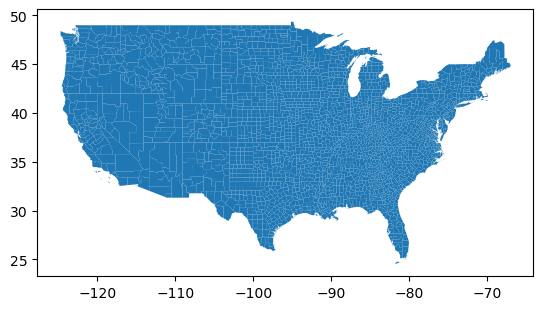

In [19]:
# You can use .plot() method to plot the GeoDataFrame. If there is no 'geometry' column, it will plot a numerical values.
county_gdf_us.plot()

---
### *Exercise*
1. The following in the syntax for the `loc` function in Pandas. Select rows for New York State (State ID: 36) and assign it to a new variable called `ny_gdf`. <br>

    ```python
    ny_gdf = county_gdf.loc[county_gdf['COLUMN NAME'] == 'STATE ID']
    ```

---

In [20]:
# Your code here
ny_gdf = county_gdf.loc[county_gdf['COLUMN NAME'] == 'STATE ID']
ny_gdf[]


KeyError: 'COLUMN NAME'

In [ ]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert ny_gdf['STATE'].unique() == '36'
assert ny_gdf.shape[0] == 62

print("Success!")

# 2. Preprocessing GDP data with Pandas
## 2.1. Load Excel File with Pandas

In [21]:
# To read a Excel file, you can use `pandas` package and .read_excel() method.
# You can also use .read_csv() method to read a CSV file.
# the output of .read_excel() and .read_csv() method is a DataFrame
gdp_df = pd.read_excel('data/GDP_data_cleaned.xlsx')
gdp_df

,GeoFips,GeoName,LineCode,Description,GDP
0,1001,"Autauga, AL",1,Real GDP (thousands of chained 2017 dollars),1722438
1,1001,"Autauga, AL",2,Chain-type quantity indexes for real GDP,97.724
2,1001,"Autauga, AL",3,Current-dollar GDP (thousands of current dollars),1813553
3,1003,"Baldwin, AL",1,Real GDP (thousands of chained 2017 dollars),8102009
4,1003,"Baldwin, AL",2,Chain-type quantity indexes for real GDP,109.745
...,...,...,...,...,...
9349,56043,"Washakie, WY",2,Chain-type quantity indexes for real GDP,100.577
9350,56043,"Washakie, WY",3,Current-dollar GDP (thousands of current dollars),365071
9351,56045,"Weston, WY",1,Real GDP (thousands of chained 2017 dollars),286131
9352,56045,"Weston, WY",2,Chain-type quantity indexes for real GDP,100.336


In [22]:
type(gdp_df)

pandas.core.frame.DataFrame

## 2.2. Check the data type of columns of the Pandas DataFrame and change the data type accordingly

In [23]:
# Using .dtypes attribute, you can check the data type of each column.
gdp_df.dtypes

GeoFips         int64
GeoName        object
LineCode        int64
Description    object
GDP            object
dtype: object

In [31]:
# Since the 'GeoFips' column is a numerical value, we need to convert it to a string.
# You can use .astype() method to convert the data type of a column.
gdp_df['GeoFips'] = gdp_df['GeoFips'].astype(str)
gdp_df.dtypes

GeoFips        object
GeoName        object
LineCode        int64
Description    object
GDP            object
dtype: object

## 2.3. Solve the problem of missing leading zero (e.g., Alabama: 01)

You will notice that the entry of GeoFips column is missing the leading zero for the state code. For example, the state code for Alabama is '01', but the entry of GeoFips column is '1' (no leading zero). It is a common problem when you save string into excel or csv file. Now, we need to add the leading zero to the state code.

In [25]:
gdp_df_clean = gdp_df.copy()
gdp_df_clean

,GeoFips,GeoName,LineCode,Description,GDP
0,1001,"Autauga, AL",1,Real GDP (thousands of chained 2017 dollars),1722438
1,1001,"Autauga, AL",2,Chain-type quantity indexes for real GDP,97.724
2,1001,"Autauga, AL",3,Current-dollar GDP (thousands of current dollars),1813553
3,1003,"Baldwin, AL",1,Real GDP (thousands of chained 2017 dollars),8102009
4,1003,"Baldwin, AL",2,Chain-type quantity indexes for real GDP,109.745
...,...,...,...,...,...
9349,56043,"Washakie, WY",2,Chain-type quantity indexes for real GDP,100.577
9350,56043,"Washakie, WY",3,Current-dollar GDP (thousands of current dollars),365071
9351,56045,"Weston, WY",1,Real GDP (thousands of chained 2017 dollars),286131
9352,56045,"Weston, WY",2,Chain-type quantity indexes for real GDP,100.336


In [25]:
gdp_df_clean = gdp_df.copy()
gdp_df_clean

,GeoFips,GeoName,LineCode,Description,GDP
0,1001,"Autauga, AL",1,Real GDP (thousands of chained 2017 dollars),1722438
1,1001,"Autauga, AL",2,Chain-type quantity indexes for real GDP,97.724
2,1001,"Autauga, AL",3,Current-dollar GDP (thousands of current dollars),1813553
3,1003,"Baldwin, AL",1,Real GDP (thousands of chained 2017 dollars),8102009
4,1003,"Baldwin, AL",2,Chain-type quantity indexes for real GDP,109.745
...,...,...,...,...,...
9349,56043,"Washakie, WY",2,Chain-type quantity indexes for real GDP,100.577
9350,56043,"Washakie, WY",3,Current-dollar GDP (thousands of current dollars),365071
9351,56045,"Weston, WY",1,Real GDP (thousands of chained 2017 dollars),286131
9352,56045,"Weston, WY",2,Chain-type quantity indexes for real GDP,100.336


In [26]:
# .iterrows() method is used to iterate over the rows of a DataFrame. It returns an iterator containing index of each row and the data in each row as a Series.
for idx, row in gdp_df_clean.iterrows():
    
    # Check the length of the GeoFips column (i.e., len(row['GeoFips']))
    if len(row['GeoFips']) == 4: # if the length of the GeoFips column is 4, it means that there is a missing leading zero.
        gdp_df_clean.at[idx, 'GEOID'] = '0' + row['GeoFips'] # add a leading zero to the GeoFips column
    elif len(row['GeoFips']) == 5: # if the length of the GeoFips column is 5, it means that there is no missing leading zero.
        gdp_df_clean.at[idx, 'GEOID'] = row['GeoFips']
    else:  # You can also check if there are any unexpected length of GeoFips column.
        print('Unexpected Length of GeoFips')

gdp_df_clean

,GeoFips,GeoName,LineCode,Description,GDP,GEOID
0,1001,"Autauga, AL",1,Real GDP (thousands of chained 2017 dollars),1722438,01001
1,1001,"Autauga, AL",2,Chain-type quantity indexes for real GDP,97.724,01001
2,1001,"Autauga, AL",3,Current-dollar GDP (thousands of current dollars),1813553,01001
3,1003,"Baldwin, AL",1,Real GDP (thousands of chained 2017 dollars),8102009,01003
4,1003,"Baldwin, AL",2,Chain-type quantity indexes for real GDP,109.745,01003
...,...,...,...,...,...,...
9349,56043,"Washakie, WY",2,Chain-type quantity indexes for real GDP,100.577,56043
9350,56043,"Washakie, WY",3,Current-dollar GDP (thousands of current dollars),365071,56043
9351,56045,"Weston, WY",1,Real GDP (thousands of chained 2017 dollars),286131,56045
9352,56045,"Weston, WY",2,Chain-type quantity indexes for real GDP,100.336,56045


In [32]:
gdp_df_clean_new = gdp_df.copy()

gdp_df_clean_new.apply(lambda x: '0' + x['GeoFips'] if len(x['GeoFips']) == 4 else x['GeoFips'], axis=1)

# gdp_df_clean_new['GEOID'] = gdp_df_clean_new.apply(lambda x: '0' + x['GeoFips'] if len(x['GeoFips']) == 4 else x['GeoFips'], axis=1)
# gdp_df_clean_new

0       01001
1       01001
2       01001
3       01003
4       01003
        ...  
9349    56043
9350    56043
9351    56045
9352    56045
9353    56045
Length: 9354, dtype: object

## 2.4. Select rows based on a condition

Each county has three records (Real GDP, Chain-type quantity indexes for real GDP, Current-dollar GDP) with the same value of GeoFips. We only need the record of Real GDP. So, we need to select the rows based on the value of Line Code column (Real GDP has the value of 1 in the `LineCode` column).

In [34]:
gdp_df_clean = gdp_df_clean.loc[gdp_df['LineCode'] == 1] #.reset_index(drop=True)
gdp_df_clean

,GEOID,GeoName,GDP
0,01001,"Autauga, AL",1722438
3,01003,"Baldwin, AL",8102009
6,01005,"Barbour, AL",731636
9,01007,"Bibb, AL",460018
12,01009,"Blount, AL",907179
...,...,...,...
9339,56037,"Sweetwater, WY",3405807
9342,56039,"Teton, WY",2659859
9345,56041,"Uinta, WY",783682
9348,56043,"Washakie, WY",344531


.loc method syntax is `df.loc[row condition, column condition]`. <br>
You can enter the list of columns you want to select in the column condition. If you want to select all columns, you can use `:`.

# 3. Plotting county-level GDP for the conterminous United States
## 3.1. Join (Merge) county geometry and GDP data

Currently, `county_gdf` has geometry data and `gdp_df` has GDP data. We need to join (merge) these two datasets to make a choropleth map.

In [36]:
# Checking `count_gdf`
county_gdf

,GEOID,NAME,geometry,STATE
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253...",01
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621...",01
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000...",01
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765...",01
...,...,...,...,...
3229,72151,"Yabucoa Municipio, Puerto Rico","POLYGON ((-65.82748 18.05507, -65.82910 18.052...",72
3230,72153,"Yauco Municipio, Puerto Rico","POLYGON ((-66.87603 18.01490, -66.87813 18.016...",72
3231,78010,None,"MULTIPOLYGON (((-64.84404 17.68717, -64.84570 ...",78
3232,78020,None,"MULTIPOLYGON (((-64.79905 18.32969, -64.79862 ...",78


In [37]:
# Checking `gdp_df_clean`
gdp_df_clean

,GEOID,GeoName,GDP
0,01001,"Autauga, AL",1722438
3,01003,"Baldwin, AL",8102009
6,01005,"Barbour, AL",731636
9,01007,"Bibb, AL",460018
12,01009,"Blount, AL",907179
...,...,...,...
9339,56037,"Sweetwater, WY",3405807
9342,56039,"Teton, WY",2659859
9345,56041,"Uinta, WY",783682
9348,56043,"Washakie, WY",344531


Both `county_gdf` and `gdp_df` have the column of `GEOID`, so that it can be used for the join. 

In [38]:
# It is also recommend to check the data type of the column(s) that you want to merge.
gdp_df.dtypes

GeoFips        object
GeoName        object
LineCode        int64
Description    object
GDP            object
dtype: object

In [39]:
county_gdf.dtypes

GEOID         object
NAME          object
geometry    geometry
STATE         object
dtype: object

Merge (join) method syntax is `df1.merge(df2, on='COLUMN NAME')`. <br>

resource: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [40]:
gdp_gdf = county_gdf_us.merge(gdp_df_clean, on='GEOID', how='left')
gdp_gdf

,GEOID,NAME,geometry,STATE,GeoName,GDP
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01,"Autauga, AL",1722438
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253...",01,"Baldwin, AL",8102009
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621...",01,"Barbour, AL",731636
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000...",01,"Bibb, AL",460018
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765...",01,"Blount, AL",907179
...,...,...,...,...,...,...
3103,56037,"Sweetwater County, Wyoming","POLYGON ((-110.04890 41.46490, -110.04800 41.5...",56,"Sweetwater, WY",3405807
3104,56039,"Teton County, Wyoming","POLYGON ((-111.04558 43.61783, -111.04563 43.6...",56,"Teton, WY",2659859
3105,56041,"Uinta County, Wyoming","POLYGON ((-110.58367 41.57916, -110.57956 41.5...",56,"Uinta, WY",783682
3106,56043,"Washakie County, Wyoming","POLYGON ((-108.55056 44.16846, -108.50652 44.1...",56,"Washakie, WY",344531


In [41]:
# Since we did the left-join, there are some missing values in the GDP column.
# The following code is to select the rows that have missing values (NULL/NaN value ) in the GDP column.

gdp_gdf.loc[gdp_gdf['GDP'].isna()]

,GEOID,NAME,geometry,STATE,GeoName,GDP
2787,51003,"Albemarle County, Virginia","POLYGON ((-78.42050 37.87707, -78.46776 37.823...",51,NaN,NaN
2788,51005,"Alleghany County, Virginia","POLYGON ((-79.85473 37.88781, -79.80806 37.880...",51,NaN,NaN
2793,51015,"Augusta County, Virginia","POLYGON ((-79.06381 37.91714, -79.06691 37.914...",51,NaN,NaN
2801,51031,"Campbell County, Virginia","POLYGON ((-79.26079 37.13022, -79.26442 37.126...",51,NaN,NaN
2803,51035,"Carroll County, Virginia","POLYGON ((-80.62115 36.61572, -80.61934 36.613...",51,NaN,NaN
2812,51053,"Dinwiddie County, Virginia","POLYGON ((-77.39688 37.05792, -77.39612 37.050...",51,NaN,NaN
2814,51059,"Fairfax County, Virginia","MULTIPOLYGON (((-77.36709 38.71408, -77.36786 ...",51,NaN,NaN
2819,51069,"Frederick County, Virginia","POLYGON ((-78.33522 39.06134, -78.34099 39.063...",51,NaN,NaN
2825,51081,"Greensville County, Virginia","POLYGON ((-77.74420 36.57991, -77.72176 36.613...",51,NaN,NaN
2829,51089,"Henry County, Virginia","POLYGON ((-79.92008 36.54245, -79.93327 36.542...",51,NaN,NaN


In [44]:
# We can simply replace the NaN values with 0, using .fillna() method.
gdp_gdf['GDP'] = gdp_gdf['GDP'].fillna(0)

In [45]:
# NaN values are gone!
gdp_gdf.loc[gdp_gdf['GDP'].isna()]

,GEOID,NAME,geometry,STATE,GeoName,GDP


In [46]:
gdp_gdf

,GEOID,NAME,geometry,STATE,GeoName,GDP
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01,"Autauga, AL",1722438
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253...",01,"Baldwin, AL",8102009
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621...",01,"Barbour, AL",731636
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000...",01,"Bibb, AL",460018
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765...",01,"Blount, AL",907179
...,...,...,...,...,...,...
3103,56037,"Sweetwater County, Wyoming","POLYGON ((-110.04890 41.46490, -110.04800 41.5...",56,"Sweetwater, WY",3405807
3104,56039,"Teton County, Wyoming","POLYGON ((-111.04558 43.61783, -111.04563 43.6...",56,"Teton, WY",2659859
3105,56041,"Uinta County, Wyoming","POLYGON ((-110.58367 41.57916, -110.57956 41.5...",56,"Uinta, WY",783682
3106,56043,"Washakie County, Wyoming","POLYGON ((-108.55056 44.16846, -108.50652 44.1...",56,"Washakie, WY",344531


## 3.2. Make a choropleth map of GDP data 

GeoDataFrame has a built-in function called `plot` to make a choropleth map. <br>

Syntax: `GeoDataFrame.plot(column='COLUMN NAME', cmap='COLOR MAP NAME', legend=True, figsize=(WIDTH, HEIGHT))`

Reference: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html

<Axes: >

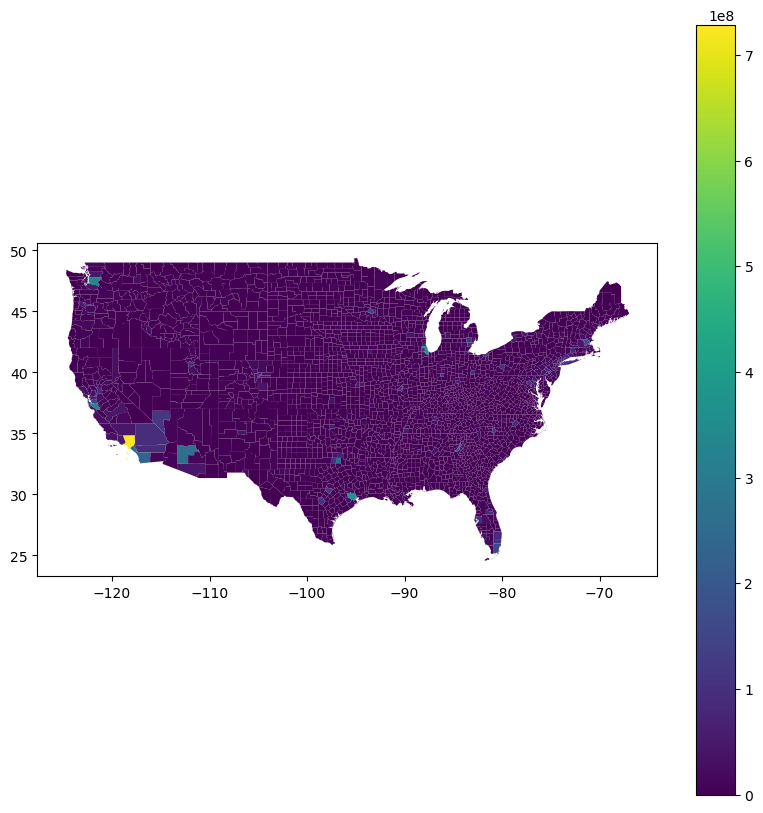

In [47]:
gdp_gdf.plot(column='GDP', figsize=(10,10), legend=True)

`camp` attribute is used to change the color map. <br>
various color maps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

<Axes: >

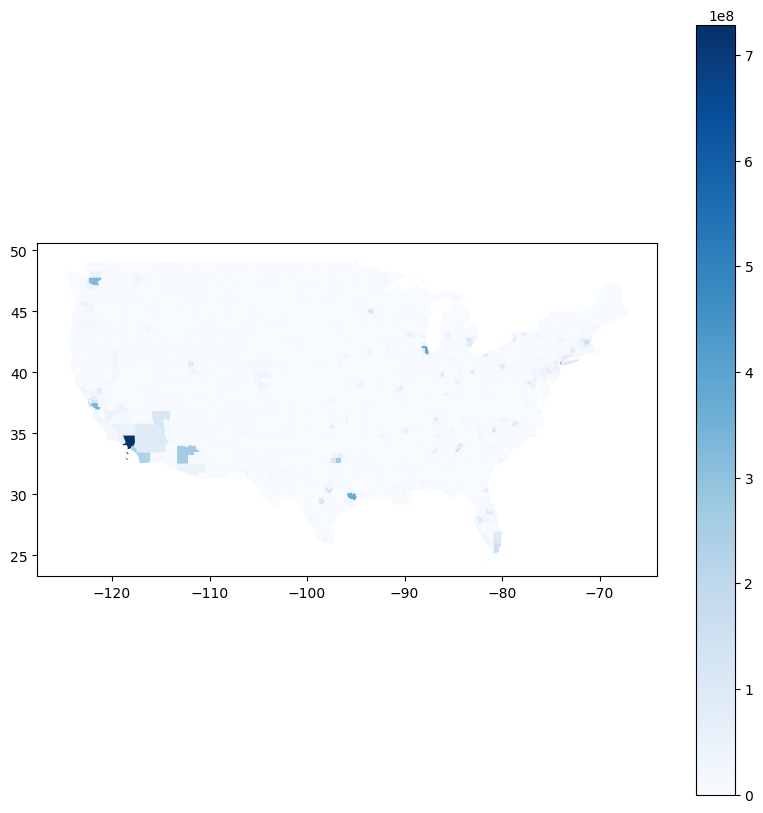

In [48]:
gdp_gdf.plot(column='GDP', cmap='Blues', figsize=(10,10), legend=True)

`scheme` attribute is used to change the classification method. <br>
various classification methods: https://pysal.org/mapclassify/api.html

C:\Users\30123\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


<Axes: >

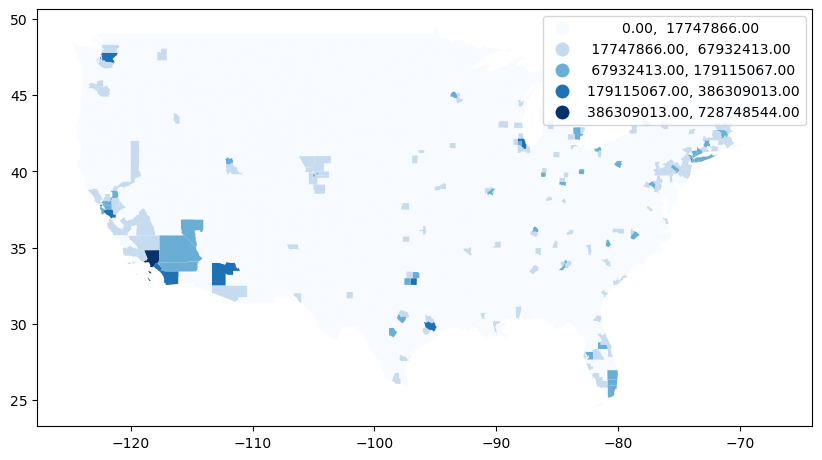

In [52]:
gdp_gdf.plot(column='GDP', 
             cmap='Blues', 
             scheme='NaturalBreaks', 
             figsize=(10,10), 
             legend=True)

C:\Users\30123\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


<Axes: >

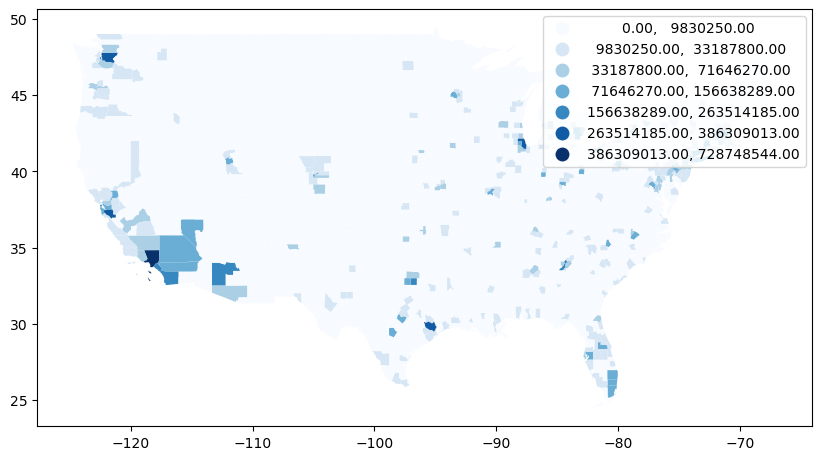

In [51]:
gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7)

The current coordinate system of `gdp_gdf` is NAD83, and we want to change it to a Projected Coordinate System. <br>
You can use `to_crs` function to change the coordinate system based on a epsg code. <br>
You can find the EPSG code of the coordinate system you want to use from https://epsg.io/. <br>

C:\Users\30123\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


<Axes: >

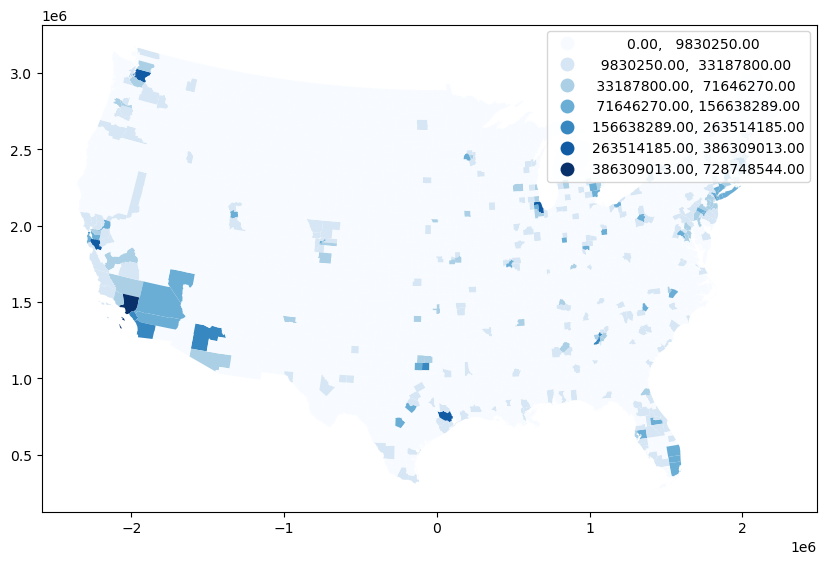

In [56]:
gdp_gdf = gdp_gdf.to_crs(epsg=5070)
gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7)

The current map is missing the state boundary, making the interpretation of the map difficult. <br>
We can create a new layer of state boundary using `state_gdf` and add it to the current map. <br>

In [57]:
county_gdf

,GEOID,NAME,geometry,STATE
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253...",01
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621...",01
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000...",01
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765...",01
...,...,...,...,...
3229,72151,"Yabucoa Municipio, Puerto Rico","POLYGON ((-65.82748 18.05507, -65.82910 18.052...",72
3230,72153,"Yauco Municipio, Puerto Rico","POLYGON ((-66.87603 18.01490, -66.87813 18.016...",72
3231,78010,None,"MULTIPOLYGON (((-64.84404 17.68717, -64.84570 ...",78
3232,78020,None,"MULTIPOLYGON (((-64.79905 18.32969, -64.79862 ...",78


In [59]:
# .dissolve() method is used to dissolve a GeoDataFrame based on a column.
state_gdf = county_gdf_us.dissolve('STATE')
state_gdf

,geometry,GEOID,NAME
STATE,,,
01,"MULTIPOLYGON (((-88.33310 30.38988, -88.33289 ...",01001,"Autauga County, Alabama"
04,"POLYGON ((-110.96527 31.33243, -110.97682 31.3...",04001,"Apache County, Arizona"
05,"POLYGON ((-90.95558 34.11888, -90.94769 34.109...",05001,"Arkansas County, Arkansas"
06,"MULTIPOLYGON (((-118.55845 33.00683, -118.5527...",06001,"Alameda County, California"
08,"POLYGON ((-102.04158 37.64428, -102.04162 37.6...",08001,"Adams County, Colorado"
09,"MULTIPOLYGON (((-73.62361 40.98214, -73.62513 ...",09001,"Fairfield County, Connecticut"
10,"MULTIPOLYGON (((-75.35580 38.45201, -75.37105 ...",10001,"Kent County, Delaware"
11,"POLYGON ((-77.06937 38.90037, -77.07010 38.900...",11001,"District of Columbia, District of Columbia"
12,"MULTIPOLYGON (((-81.99899 24.52963, -82.00098 ...",12001,"Alachua County, Florida"


<Axes: >

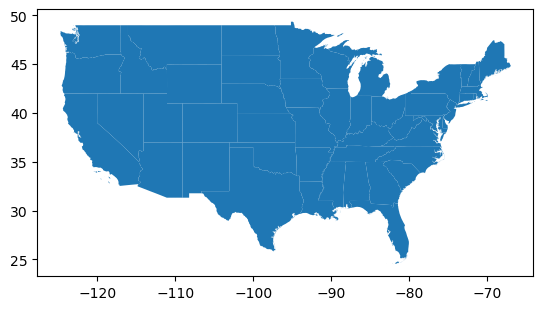

In [62]:
state_gdf.plot()

<Axes: >

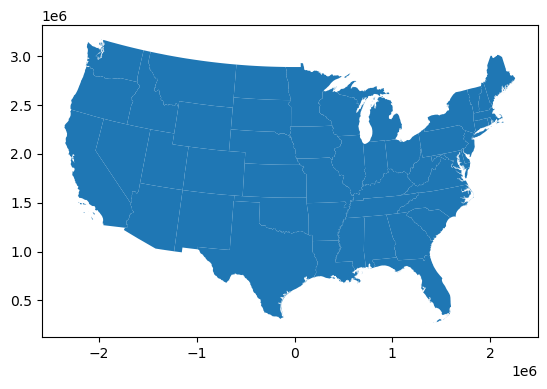

In [63]:
# To overlay two layers, we need to match the crs of the state_gdf to the crs of the gdp_gdf.
state_gdf = state_gdf.to_crs(epsg=5070)
state_gdf.plot()

<Axes: >

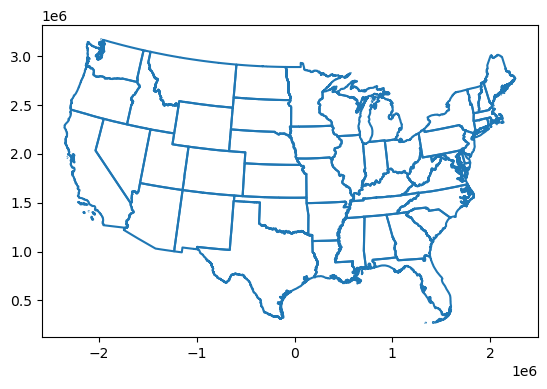

In [64]:
# You can use .boundary attribute to get the boundary of the GeoDataFrame.
state_gdf.boundary.plot()

C:\Users\30123\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


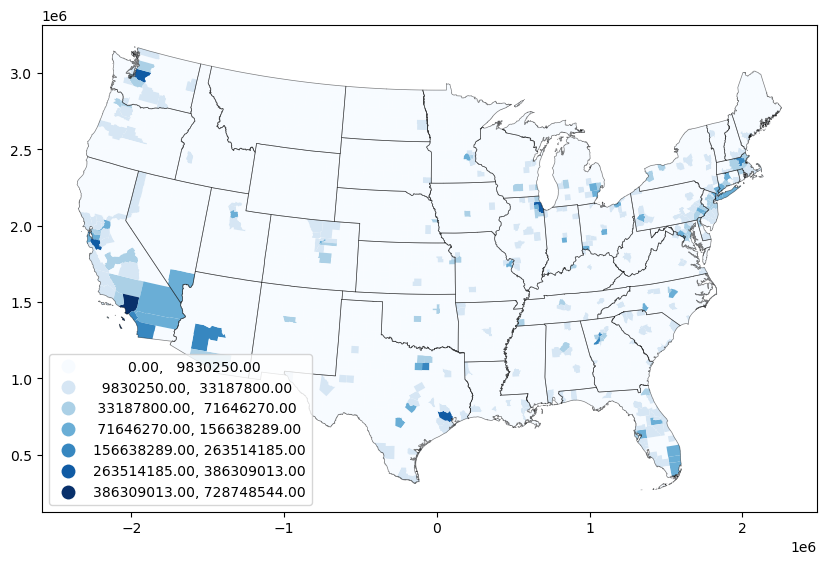

In [65]:
fig, ax = plt.subplots(figsize=(10,10))

gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7, ax=ax, legend_kwds={'loc': 'lower left'})
state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)
plt.show()

To see the top 10 counties with the highest GDP, we can sort the GeoDataFrame by the GDP column and select the top 10 rows. <br>

syntax: `GeoDataFrame.sort_values(by='COLUMN NAME', ascending=False)`

In [ ]:
gdp_gdf = gdp_gdf.sort_values(by='GDP', ascending=False)
gdp_gdf.head(10)

# Summary

the following is the backbone of the code for the analysis. <br>

In [67]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read the county shapefile
county_gdf = gpd.read_file('./data/county_simplified.shp')

# Assign the first two characters of the GEOID column to the STATE column
for idx, row in county_gdf.iterrows():
    county_gdf.at[idx, 'STATE'] = row['GEOID'][0:2]

# GEOID for Conterminous US States (Lower 48 States)
lower_48_states = ['01', '04', '05', '06', '08', '09', '10', '11', '12', '13', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', 
                   '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', 
                   '53', '54', '55', '56']


# It is also possible to use the .isin() method to filter a DataFrame based on a list of values.
county_gdf_us = county_gdf_us.loc[county_gdf['STATE'].isin(lower_48_states)]
county_gdf_us

,GEOID,NAME,geometry,STATE
0,01001,"Autauga County, Alabama","POLYGON ((-86.45876 32.40573, -86.46056 32.404...",01
1,01003,"Baldwin County, Alabama","POLYGON ((-87.93604 30.26147, -87.91825 30.253...",01
2,01005,"Barbour County, Alabama","POLYGON ((-85.74174 31.61940, -85.73981 31.621...",01
3,01007,"Bibb County, Alabama","POLYGON ((-86.87630 33.00306, -86.87644 33.000...",01
4,01009,"Blount County, Alabama","POLYGON ((-86.57753 33.80198, -86.57780 33.765...",01
...,...,...,...,...
3138,56037,"Sweetwater County, Wyoming","POLYGON ((-110.04890 41.46490, -110.04800 41.5...",56
3139,56039,"Teton County, Wyoming","POLYGON ((-111.04558 43.61783, -111.04563 43.6...",56
3140,56041,"Uinta County, Wyoming","POLYGON ((-110.58367 41.57916, -110.57956 41.5...",56
3141,56043,"Washakie County, Wyoming","POLYGON ((-108.55056 44.16846, -108.50652 44.1...",56


In [ ]:
# Read the GDP Excel data
gdp_df = pd.read_excel('data/GDP_data_cleaned.xlsx')

# convert the GeoFips column to string
gdp_df['GeoFips'] = gdp_df['GeoFips'].astype(str) 

gdp_df = gdp_df.loc[gdp_df['LineCode'] == 1].reset_index(drop=True)

# Add a leading zero to the GeoFips column if the length of the GeoFips column is 4
for idx, row in gdp_df.iterrows():
    if len(row['GeoFips']) == 4: 
        gdp_df.at[idx, 'GEOID'] = '0' + row['GeoFips'] 
    elif len(row['GeoFips']) == 5: 
        gdp_df.at[idx, 'GEOID'] = row['GeoFips']
    else:  
        print('Unexpected Length of GeoFips')

gdp_df

In [ ]:
# Join the county GeoDataFrame (county_gdf) and the GDP DataFrame (gdp_df)
gdp_gdf = county_gdf_us.merge(gdp_df, on='GEOID', how='left')

# Fill the NaN values in the GDP column with 0
gdp_gdf['GDP'] = gdp_gdf['GDP'].fillna(0)

# Change coordinate system for better visualization
gdp_gdf = gdp_gdf.to_crs(epsg=5070)

gdp_gdf

In [ ]:
# .dissolve() method is used to dissolve a GeoDataFrame based on a column.
state_gdf = county_gdf_us.dissolve('STATE')

# To overlay two layers, we need to match the crs of the state_gdf to the crs of the gdp_gdf.
state_gdf = state_gdf.to_crs(epsg=5070)


In [ ]:
# Plot the GDP by county

fig, ax = plt.subplots(figsize=(10,10))

gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7, ax=ax, legend_kwds={'loc': 'lower left'})
state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

plt.show()

# 4. Hands-on practice using population data with Pandas and GeoPandas

For this section, you will be using the population data to make a choropleth map of population for the conterminous United States. <br>
The major structure will be very similar to the GDP map. If you are stuck, you can consult with the summary above<br>
To complete the hands-on practice, please follow the steps below. <br>

## 4.1. Preprocessing the population data with Pandas 

In [82]:
# Read the population data from the American Community Survey (ACS)
pop_df = pd.read_csv('./data/ACSDP5Y2020.DP05-Data.csv')
pop_df

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PE,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM
0,0500000US01001,"Autauga County, Alabama",55639,*****,27052,167,28587,167,94.6,1.1,...,1.9,0.7,(X),(X),41959,(X),47.6,0.4,52.4,0.4
1,0500000US01003,"Baldwin County, Alabama",218289,*****,105889,253,112400,253,94.2,0.4,...,1.8,0.4,(X),(X),167986,(X),47.8,0.2,52.2,0.2
2,0500000US01005,"Barbour County, Alabama",25026,*****,13156,86,11870,86,110.8,1.5,...,1.2,0.6,(X),(X),19468,(X),53.2,0.2,46.8,0.2
3,0500000US01007,"Bibb County, Alabama",22374,*****,12022,170,10352,170,116.1,3.6,...,0.4,0.3,(X),(X),17583,(X),53.6,0.4,46.4,0.4
4,0500000US01009,"Blount County, Alabama",57755,*****,28677,153,29078,153,98.6,1,...,1.6,0.3,(X),(X),42978,(X),48.9,0.3,51.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,0500000US72145,"Vega Baja Municipio, Puerto Rico",51089,*****,24420,*****,26669,*****,91.6,*****,...,0.0,0.1,(X),(X),41192,(X),47.0,0.1,53.0,0.1
3217,0500000US72147,"Vieques Municipio, Puerto Rico",8508,*****,4356,148,4152,148,104.9,7.3,...,0.0,0.6,(X),(X),6869,(X),50.2,0.2,49.8,0.2
3218,0500000US72149,"Villalba Municipio, Puerto Rico",21899,*****,10589,*****,11310,*****,93.6,*****,...,0.0,0.2,(X),(X),17310,(X),47.4,0.1,52.6,0.1
3219,0500000US72151,"Yabucoa Municipio, Puerto Rico",32867,*****,15883,*****,16984,*****,93.5,*****,...,0.0,0.1,(X),(X),26747,(X),47.6,0.1,52.4,0.1


---
### *Exercise*
2. The following in the syntax for the `loc` function in Pandas. Select three columns ('GEO_ID', 'NAME', 'DP05_001E') for `pop_df` and assign the selection back to `pop_df` <br>

    'GEO_ID' is the IDs of counties <br>
    'NAME' is the county name. <br>
    'DP05_001E' is the population per county. <br>

    ```python
    `DataFrame` = `DataFrame`.loc[row condition, column condition]
    ```
---

In [111]:
# Your code here
pop_df = pop_df.loc[:, ['GEO_ID', 'NAME', 'DP05_0001E']]
print(pop_df)

              GEO_ID                              NAME  DP05_0001E
0     0500000US01001           Autauga County, Alabama       55639
1     0500000US01003           Baldwin County, Alabama      218289
2     0500000US01005           Barbour County, Alabama       25026
3     0500000US01007              Bibb County, Alabama       22374
4     0500000US01009            Blount County, Alabama       57755
...              ...                               ...         ...
3216  0500000US72145  Vega Baja Municipio, Puerto Rico       51089
3217  0500000US72147    Vieques Municipio, Puerto Rico        8508
3218  0500000US72149   Villalba Municipio, Puerto Rico       21899
3219  0500000US72151    Yabucoa Municipio, Puerto Rico       32867
3220  0500000US72153      Yauco Municipio, Puerto Rico       34501

[3221 rows x 3 columns]


In [112]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert pop_df.columns.to_list() == ['GEO_ID', 'NAME', 'DP05_0001E']
assert pop_df.shape == (3221, 3)

print("Success!")

Success!


In [113]:
pop_df

,GEO_ID,NAME,DP05_0001E
0,0500000US01001,"Autauga County, Alabama",55639
1,0500000US01003,"Baldwin County, Alabama",218289
2,0500000US01005,"Barbour County, Alabama",25026
3,0500000US01007,"Bibb County, Alabama",22374
4,0500000US01009,"Blount County, Alabama",57755
...,...,...,...
3216,0500000US72145,"Vega Baja Municipio, Puerto Rico",51089
3217,0500000US72147,"Vieques Municipio, Puerto Rico",8508
3218,0500000US72149,"Villalba Municipio, Puerto Rico",21899
3219,0500000US72151,"Yabucoa Municipio, Puerto Rico",32867


---
### *Exercise*
3. Get the two-digit state ID and five-digit county ID from the `GEO_ID` column. Currently the information in the `GEO_ID` column is something like '0500000US01001'. <br>
3.1. Iterate through population dataframe (`pop_df`) using for loop and .iterrows() method. <br><br>
3.2. Within the for loop, slice the information in the `GEO_ID` column using its index to get the two-digit state ID and five-digit county ID. For the five-digit county ID, you can assign it to `GEOID` column and two-digit state ID need to be assigned to `STATE` column. <br>

    Hint: df.at[index, 'COLUMN NAME'] = 'VALUE' <br>


Expected results are as follows: <br>
<img src="./images/q3.jpg">
---

In [105]:
LST = [1, 2]

In [106]:
LST[1]

2

In [107]:
pop_df['GEO_ID'][0].split('US')

'01001'

In [118]:

for idx, row in pop_df.iterrows():

    geoid = row['GEO_ID']
    county_id = geoid.split("US")[1]
    state_id = county_id[0:2] 


    pop_df.at[idx, 'STATE'] = state_id
    pop_df.at[idx, 'GEOID'] = county_id


In [115]:
pop_df

,GEO_ID,NAME,DP05_0001E,STATE,GEOID
0,0500000US01001,"Autauga County, Alabama",55639,01,01001
1,0500000US01003,"Baldwin County, Alabama",218289,01,01003
2,0500000US01005,"Barbour County, Alabama",25026,01,01005
3,0500000US01007,"Bibb County, Alabama",22374,01,01007
4,0500000US01009,"Blount County, Alabama",57755,01,01009
...,...,...,...,...,...
3216,0500000US72145,"Vega Baja Municipio, Puerto Rico",51089,72,72145
3217,0500000US72147,"Vieques Municipio, Puerto Rico",8508,72,72147
3218,0500000US72149,"Villalba Municipio, Puerto Rico",21899,72,72149
3219,0500000US72151,"Yabucoa Municipio, Puerto Rico",32867,72,72151


In [ ]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert 'STATE' in pop_df.columns.to_list()
assert 'GEOID' in pop_df.columns.to_list()
assert pop_df.at[0, 'STATE'] == '01'
assert pop_df.shape == (3221, 5)

print("Success!")

The following cell is to select counties for the conterminous United States. <br>

In [ ]:
pop_df = pop_df.loc[pop_df['STATE'].isin(lower_48_states)].reset_index(drop=True)
pop_df

## 4.2. Plotting county-level population for the conterminous United States

---
### *Exercise*
4. Join `county_gdf_us` and `pop_df` using the `.merge()` method. Merge method syntax is `df1.merge(df2, on='COLUMN NAME', how='left')`. <br>
You want you merge `pop_df` into `county_gdf_us` based on the `GEOID` column, and assigned the result into a new GeoDataFrame with the name of `pop_gdf`. <br>
<br>
resource: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

Expected results are as follows: <br>
<img src="./images/q4.jpg">

---



In [ ]:
# Your code here

pop_gdf

In [ ]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert 'GEOID' in pop_gdf.columns.to_list()
assert 'geometry' in pop_gdf.columns.to_list()
assert 'DP05_0001E' in pop_gdf.columns.to_list()
assert pop_gdf.shape == (3108, 8)

print("Success!")

---
### *Exercise*
5. Change the projection of `county_gdf` to `NAD83 / Conus Albers (EPSG: 5070)` using the `to_crs` method. You can simply use the syntax below. <br>
    ```python
    `GeoDataFrmae` = `GeoDataFrmae`.to_crs(epsg=`EPSG CODE`)
    ```
---



In [ ]:
# Your code here



In [ ]:
""" Test code for the previous function. 
This cell should NOT give any errors when it is run."""

assert pop_gdf.crs.to_string() == 'EPSG:5070'

print("Success!")

---
### *Exercise*
6. Create a choropleth map of population for the conterminous United States. <br>
    - Consult using the code below and fill in a proper information for the attributes below <br>
    - `column`: column with the population information <br>
    - `cmap` : Green color map (resource: https://matplotlib.org/stable/users/explain/colors/colormaps.html) <br>
    - `scheme`: Natural Break classification method <br>
    - `legend`: True (to show the legend) <br>
    - `k`: 7 (number of classes) <br>

    ```python
    fig, ax = plt.subplots(figsize=(10,10)) # Define the canvas for the map

    # Plot the population data
    pop_gdf.plot(column='COLUMN NAME', cmap='COLOR MAP NAME', scheme='CLASSIFICATION METHOD', legend=True, k=NUMBER OF CLASSES, ax=axis)

    # Plot the state boundary
    state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

    # Show the map
    plt.show()
    ```

Expected results are as follows: <br>
<img src="./images/q6.jpg">

---


In [ ]:
# Your code here
fig, ax = plt.subplots(figsize=(10,10)) # Define the canvas for the map

# Plot the population data
pop_gdf.plot(column='COLUMN NAME', cmap='COLOR MAP NAME', scheme='CLASSIFICATION METHOD', legend=True, k=NUMBER OF CLASSES, ax=axis)

# Plot the state boundary
state_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

# Show the map
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7, ax=axes[0])
state_gdf.boundary.plot(ax=axes[0], color='black', linewidth=0.5, alpha=0.5)

pop_gdf.plot(column='DP05_0001E', cmap='Greens', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7, ax=axes[1])
state_gdf.boundary.plot(ax=axes[1], color='black', linewidth=0.5, alpha=0.5)
plt.show()

# Done